## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# PROJECT OVERVIEW
I analyzed a comprehensive dataset containing information on aviation accidents over a specified period. This extensive collection of over 90,000 records provides a rich source of data for understanding the complexities of aviation safety. Each record encompasses numerous variables describing various aspects of each incident, including event details, aircraft specifications, environmental conditions, and injury outcomes. By exploring this rich dataset, I aimed to uncover patterns, trends, and correlations that could inform our company's decision-making process as we enter the aviation industry.

I employed several visualizations to gain deeper understanding of aviation safety patterns:

*The distribution of injuries across different weather conditions using a bar chart, revealing how meteorological factors influence accident outcomes.
*Fatal injury counts through a pie chart, providing a clear picture of the relative severity of accidents.
*The relationship between the number of engines and fatal injuries via a scatter plot, offering insights into aircraft design and safety implications.
*Fatal injuries distribution by aircraft category using a bar plot, highlighting potential safety trends among different types of aircraft.
*Injury distribution by flight phase, utilizing another bar plot to illustrate how different stages of flight correlate with accident severity.

These visual representations serve as crucial tools for our company's new aviation division, enabling informed decisions about aircraft acquisition, operational strategies, and safety measures. This analysis demonstrates a data-driven decision making and highlights potential risks associated with different aspects of the new business venture, ultimately contributing to enhanced safety standards in our future aviation endeavors.



# Data Understanding


In [2]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px


In [3]:
# Loading  the dataset
df = pd.read_csv('data/Aviation_Data.csv',low_memory=False)

In [4]:
# Display the first few rows of the dataframe
print(df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1   

In [5]:
# Show basic statistics of the dataframe
print(df.describe())

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75% 

In [6]:
print(df.dtypes)


Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [38]:
print(df.shape)

(90348, 31)


# Data cleaning



In [7]:
useful_columns = [
    'Event.Id', 'Event.Date', 'Location', 'Aircraft.Category', 'Number.of.Engines',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
    'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Air.carrier',
    'Registration.Number', 'Make', 'Model'
]


In [8]:
# Filter the dataframe using the useful_columns
df_filtered = df[useful_columns].copy()


In [9]:
# Display null counts for each column
print("\nNull counts for filtered columns:")
for col in df_filtered.columns:
    print(f"{col}: {df_filtered[col].isnull().sum()}")



Null counts for filtered columns:
Event.Id: 1459
Event.Date: 1459
Location: 1511
Aircraft.Category: 58061
Number.of.Engines: 7543
Total.Fatal.Injuries: 12860
Total.Serious.Injuries: 13969
Total.Minor.Injuries: 13392
Total.Uninjured: 7371
Weather.Condition: 5951
Broad.phase.of.flight: 28624
Air.carrier: 73700
Registration.Number: 2776
Make: 1522
Model: 1551


In [10]:
# Handle missing values
for col in df_filtered.columns:
    if df_filtered[col].dtype == 'object':
        df_filtered[col] = df_filtered[col].fillna('Unknown')
    else:
        df_filtered[col] = df_filtered[col].fillna(df_filtered[col].median())


In [11]:
# Convert categorical variables to lowercase
categorical_columns = ['Location', 'Aircraft.Category', 'Weather.Condition', 'Broad.phase.of.flight', 'Air.carrier']
for col in categorical_columns:
    df_filtered[col] = df_filtered[col].str.lower()


In [12]:
# Convert numerical columns to numeric type
numerical_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in numerical_columns:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

In [13]:
print("\nShape of filtered dataframe:", df_filtered.shape)
print("\nColumns after filtering:")
print(df_filtered.columns.tolist())


Shape of filtered dataframe: (90348, 15)

Columns after filtering:
['Event.Id', 'Event.Date', 'Location', 'Aircraft.Category', 'Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Air.carrier', 'Registration.Number', 'Make', 'Model']


# Data Analysis


## 1: Relationship between fatal injuries and aircraft category

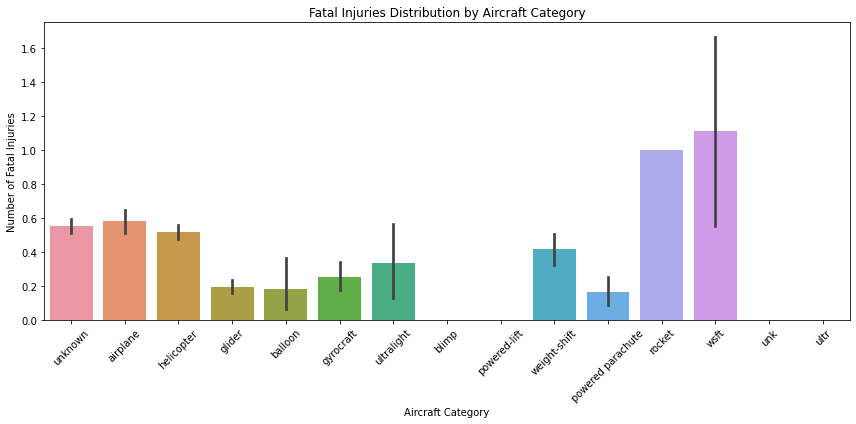

<Figure size 432x288 with 0 Axes>

In [28]:
# a bar plot showing fatal injuries distribution by aircraft category
plt.figure(figsize=(12, 6))
sns.barplot(x='Aircraft.Category', y='Total.Fatal.Injuries', data=df_filtered)
plt.title('Fatal Injuries Distribution by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Number of Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('fatal_injuries_by_aircraft_category.png', dpi=300, bbox_inches='tight')


This visualization helps identify which aircraft categories tend to have fewer fatal injuries, potentially indicating lower risk.

## 2 : Relationship between fatal injuries and number of engines

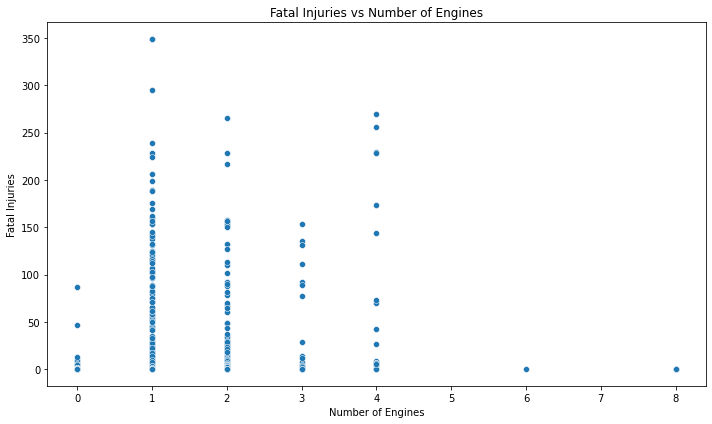

<Figure size 432x288 with 0 Axes>

In [29]:
#a scatter plot showing the relationship between the number of engines and fatal injuries:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number.of.Engines', y='Total.Fatal.Injuries', data=df_filtered)
plt.title('Fatal Injuries vs Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Fatal Injuries')
plt.tight_layout()
plt.show()
plt.savefig('fatal_injuries_vs_engines.png', dpi=300, bbox_inches='tight')


## 3: Pie chart of fatal injury counts

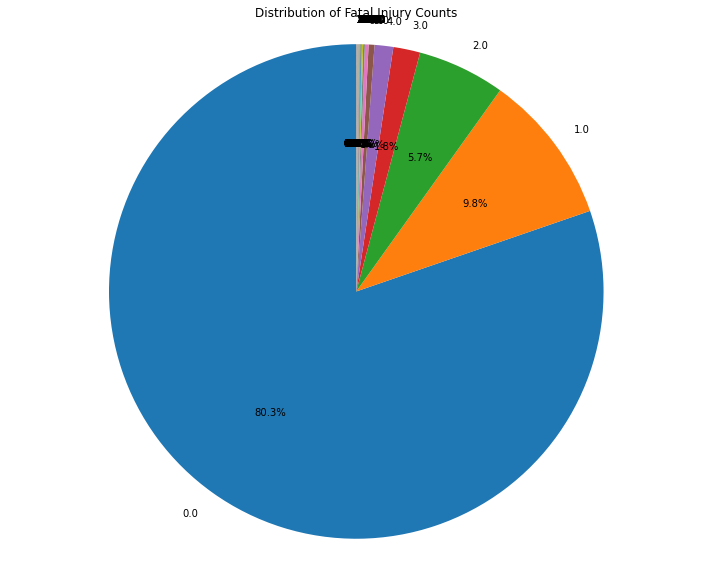

<Figure size 432x288 with 0 Axes>

In [24]:
#Pie chart of fatal injury counts
fatality_counts = df_filtered['Total.Fatal.Injuries'].value_counts().sort_index()
fatality_percentages = (fatality_counts / len(df_filtered)) * 100

plt.figure(figsize=(10, 8))
plt.pie(fatality_percentages.values, labels=fatality_percentages.index,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Fatal Injury Counts')
plt.tight_layout()
plt.show()
plt.savefig('fatal_injury_counts_pie_chart.png', dpi=300, bbox_inches='tight')


This pie chart shows the distribution of fatal injury counts across accidents. Each slice represents a different number of fatal injuries. Here's what each color means:

Red: 0 fatal injuries
Green: 1 fatal injury
Blue: 2 fatal injuries
Yellow: 3 fatal injuries
Purple: 4 fatal injuries
Orange: 5 or more fatal injuries
The size of each slice indicates the percentage of accidents that fell into that category. For example, the largest red slice represents about 80% of accidents that had zero fatal injuries

## 4: A distribution of injuries across different weather conditions

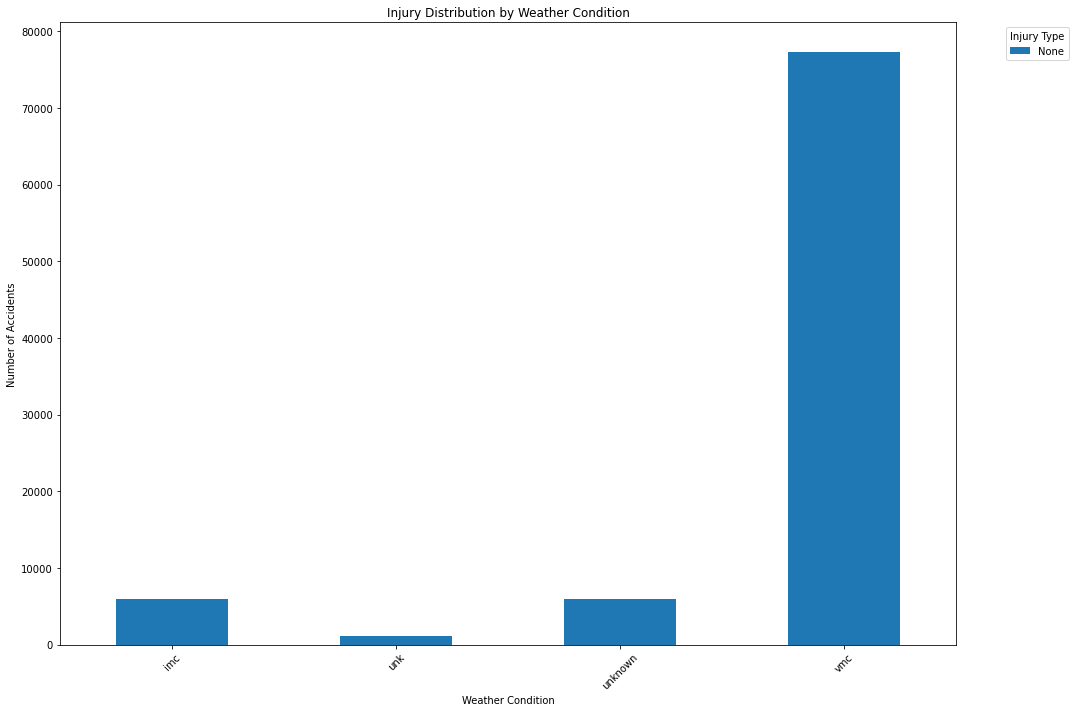

In [31]:
# bar chart showing the distribution of injuries across different weather conditions.
weather_injury_counts = df_filtered.groupby(['Weather.Condition', 'Total.Fatal.Injuries']).size().unstack(fill_value=0).sum(axis=1)

plt.figure(figsize=(15, 10))
ax = weather_injury_counts.plot(kind='bar', stacked=True, rot=45)
plt.title('Injury Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 5 Total fatal injuries by aircraft category

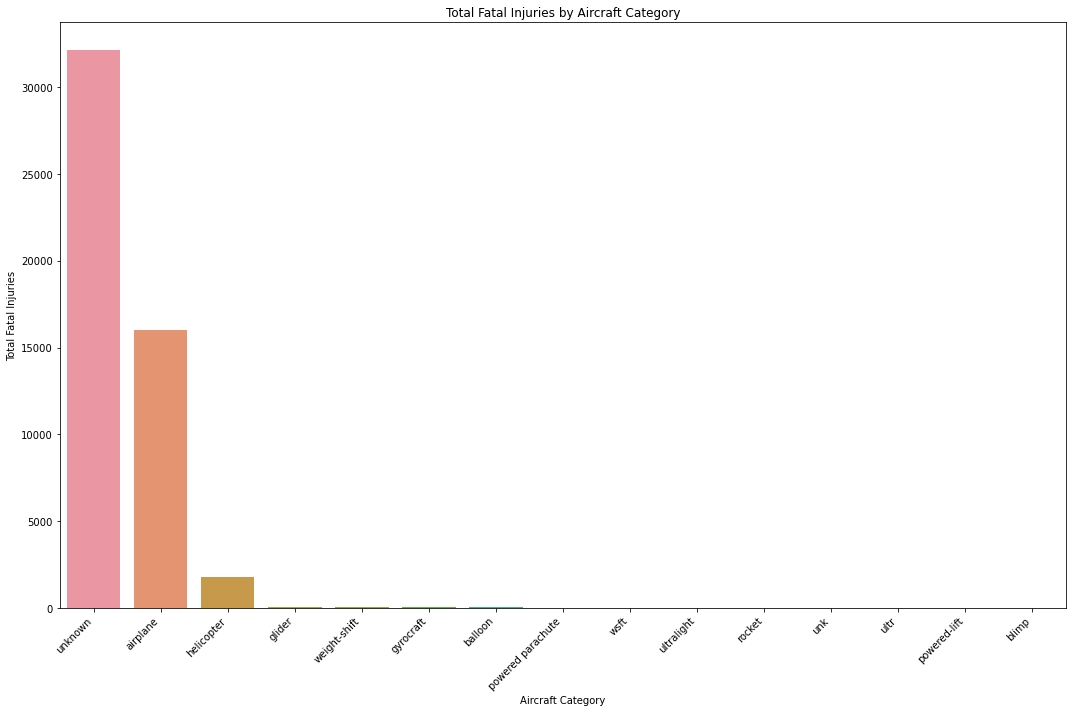

In [35]:
# A bar plot showing total fatal injuries by aircraft category
category_injury_counts = df_filtered.groupby(['Aircraft.Category'])['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x=category_injury_counts.index, y=category_injury_counts.values)
plt.title('Total Fatal Injuries by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 6. Relationship on how  different phases of flight correlate with injury severity.

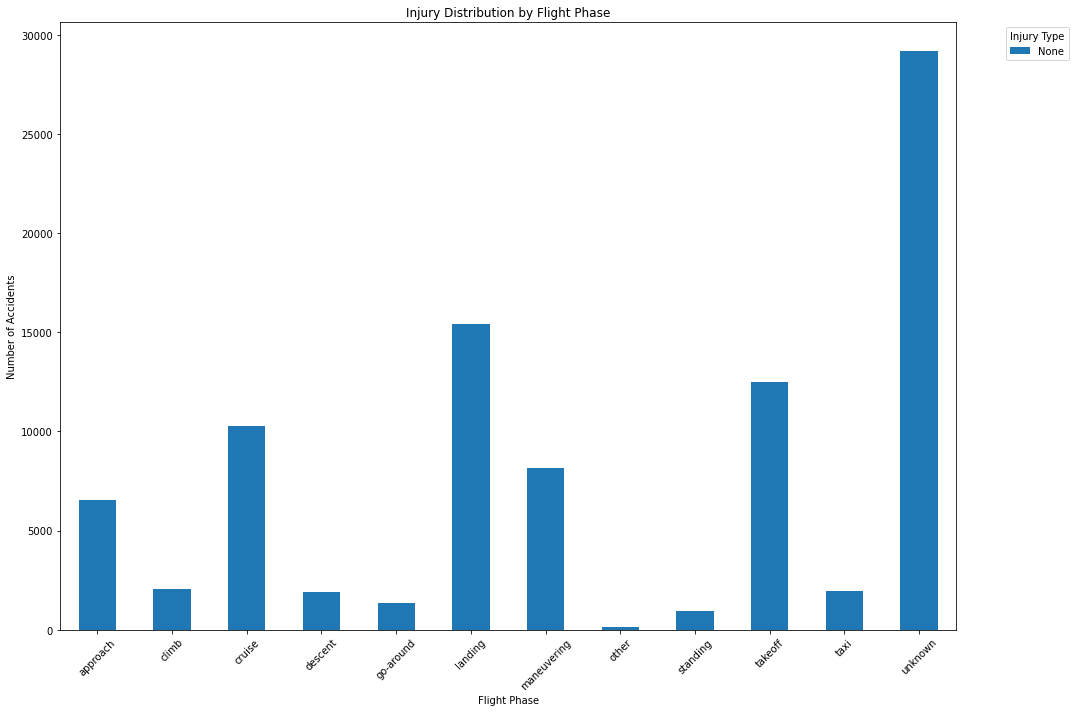

In [37]:
# a bar plot showing injury distribution by flight phase
phase_injury_counts = df_filtered.groupby(['Broad.phase.of.flight', 'Total.Fatal.Injuries'])['Event.Id'].count().unstack(fill_value=0).sum(axis=1)

plt.figure(figsize=(15, 10))
ax = phase_injury_counts.plot(kind='bar', stacked=True, rot=45)
plt.title('Injury Distribution by Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Accidents')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
